In [ ]:
! pip install pandas
! pip install numpy
! pip install networkx
! pip install matplotlib

In [2]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

**Note:** If you get stuck in section 1, you can move to section 2 and load a graph we created for you. If you get stuck in sections 2 or 3, you can move to section 4, since this section is independent of 2 and 3.

# 1. Build a social networks of retweets

We have downloaded the user profiles of Swiss politicians as well as their Twitter timelines for the time between 2021-07-12 and 2022-07-12 for you. To see how the data was downloaded, have a look at the "Appendix" section below. 

**Task 1.1:** Load the files `users.csv` and `timelines.csv` into a pandas data frame.

**Hint:** make sure to use the `dtype` function parameter to parse the columns `id`, `author_id` and `retweet_user_id` as strings. This helps prevent issues down the line, since the IDs can be very long, and loading them as integers might truncate them.

In [7]:
# load timelines and users from file
timelines = pd.read_csv(
    "timelines.csv",
    dtype={"id":str, "author_id":str, "retweet_user_id":str}, # load all IDs as string to prevent long integer overflows
    parse_dates=["created_at"] # parse the tweet creation date as datetime
)
users = pd.read_csv(
    "users.csv",
    dtype={"id":str},
    parse_dates=["created_at"]
)

timelines.head(2)

,author_id,id,lang,text,retweeted,retweet_user_id,created_at,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count
0,25254764,1546519319756115968,de,RT @ETHBildarchiv: Am 23. Dezember 1983 fand a...,True,1391450099205779456,2022-07-11 15:38:33+00:00,2,0,0,0
1,25254764,1546517720405098496,de,RT @KeremSchamberg: Morgen vor der deutschen B...,True,754651485980459009,2022-07-11 15:32:12+00:00,84,0,0,0


In [10]:
users["id"].head(3)

0      25254764
1     472372843
2    1948049047
Name: id, dtype: object

In [8]:
users["pinned_tweet_id"].head(3)

0    1.180884e+18
1    1.489913e+18
2             NaN
Name: pinned_tweet_id, dtype: float64

**Task 1.2:** Filter the tweets in the timelines such that you only retain retweets. How many retweets are in the dataset?

In [3]:
timelines = timelines[timelines["retweeted"] == True]
print(f"{len(timelines)} retweets found in the dataset")

27384 retweets found in the dataset


We only want to include retweets between politicians. 

**Task 1.3:** Filter the timelines such that the `retweet_user_id` is one of the user IDs in the user data frame. How many retweets remain in the data set?

**Hint:** The function `isin()` that you can apply on a column of a data frame is useful here!

In [4]:
timelines = timelines[timelines["retweet_user_id"].isin(users["id"])]
print(f"{len(timelines)} retweets remain in the dataset")

1936 retweets remain in the dataset


**Task 1.4:** To build the retweet network, create an empty `networkx` undirected graph and fill it with nodes and edges. For this purpose, we prepare a list of nodes and their attributes and a list of edges.
First, construct a list of vertices (nodes) and node attributes containing the user ids, screen_names, and the **political party label** of the vertices. Each entry of the list has the following form: 
Then build a list of connections between politicians (edges), where every edge is a pair of two users that exchanged at least one retweet with each other (regardless of the direction).  

**Hint:** use the function `add_edges_from()` provided by [networkx](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.add_edges_from.html) to add the edges to the graph.

**Hint:** use the function `add_nodes_from()` provided by [networkx](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.add_nodes_from.html) to add the nodes to the graph. 

In [5]:
G = nx.Graph()

nodes = users[["id", "username", "party"]]
node_list = [
    (row["id"], {"username":row["username"], "party":row["party"]}) \
    for i, row in nodes.iterrows()
]
G.add_nodes_from(node_list)

edges = timelines[["author_id", "retweet_user_id"]].drop_duplicates()
edge_list = [(row["author_id"], row["retweet_user_id"]) for i, row in edges.iterrows()]
G.add_edges_from(edge_list)

**Hint:** you can inspect the graph you greated by printing `G.nodes()` or `G.nodes(data=True)`, to also see node attributes. You can see edges in the graph by printing `G.edges`.

**Hint:** If you do not manage to create a graph after trying for a while, you can load a graph we created for you from a file:

In [ ]:
# save the graph from a file
# nx.write_gpickle(G, "swiss_politician_graph.gpickle")

# 2. Calculate graph assortativity

In [ ]:
# read the graph from a file
# G = nx.read_gpickle("swiss_politician_graph.gpickle")

Now we want to know how [assortative](https://en.wikipedia.org/wiki/Assortativity) the Swiss politicians are.  

**Task 2.1:** Use the function `attribute_assortativity_coefficient()` of [networkx](attribute_assortativity_coefficient) to calculate the assortativity with respect to party labels. How high is the value?

In [8]:
assortativity = nx.attribute_assortativity_coefficient(G, "party")
print(f"assortativity: {assortativity:05f}")

assortativity: 0.529360


**Task 2.2:** To see if the assortativity value fits your expectations, use the [function](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html) `draw_networkx()` to plot the network coloring each node according to the political party label of the politician. Does the pattern of colors fit the value of assortativity?

**Hint:** use the optional function parameters `nodelist` and `node_color` to pass a list of nodes and a list of corresponding colors to the drawing function.  
**Hint:** you can use one of [matplotlibs categorical color maps](https://matplotlib.org/stable/tutorials/colors/colormaps.html) to get a nice series of distinct colors for the parties. 



In [10]:
# create a list of nodes
node_list = nodes["id"]

# create a list with a color for each node
parties = nodes["party"].unique()
cmap = plt.get_cmap("Set3")
colors = [cmap(i) for i in range(len(parties))]
color_dict = {party:color for party, color in zip(parties, colors)}
node_colors = [color_dict[party] for party in nodes["party"]]

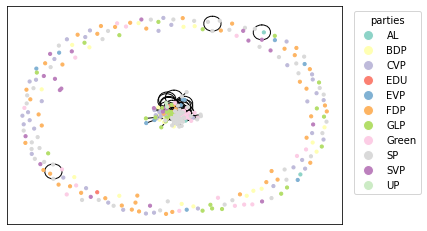

In [11]:
# draw the network including a legend
fig, ax = plt.subplots()
nx.draw_networkx(
    G, 
    nodelist=nodes["id"],
    node_color=node_colors,
    node_size=10, 
    with_labels=False,
    ax=ax
)
# let's add a legend! Since draw_network does not do this automatically, we have
# to create custom legend elements to add to the plot
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color="w", label=key,
        markerfacecolor=val, markersize=10) for key, val in color_dict.items()]
ax.legend(
    handles=legend_elements, # customly made legend handles
    title="parties", # title of the legend
    loc=1, # anchors the legend in the upper right corner
    bbox_to_anchor=[1.25, 1, 0, 0] # puts the legend outside the plot
);

**Hint:** `draw_networkx()` does not create a legend by default. If you want to add a legend to your plot, you can follow this [guide](https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html) to create a custom legend.

# 3. Permutation tests

The above result looks assortative, but how can we test if it could have happened at random and not because of party identity? Here were are going to test this with a permutation test.

**Task 3.1:** First, let's run a permutation. Perform the same assortativity calculation as above but permuting the party labels of nodes. Is the value much closer to zero?

**Hint:** You can reshuffle the party lables by calling the `sample(frac=1)` function on the `party` column of the user data frame.  
**Hint:** You can set the shuffled node attributes in the graph using the `set_node_attributes()` [function](https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.set_node_attributes.html).

In [12]:
parties = nodes["party"].sample(frac=1).values
shuffled_labels = {node:party for node, party in zip(nodes["id"], parties)}
nx.set_node_attributes(G, shuffled_labels, name="party")

In [13]:
nx.attribute_assortativity_coefficient(G, "party")

0.01754346129284038

**Task 3.2:** Repeat the calculation with 1000 permutations.

**Hint:** Create a function to shuffle node attributes and calculate assortativity to make your life easier.

In [14]:
def calculate_shuffled_assortativity(G, nodes):
    '''Function that reshuffles party labels and calculates assortativity.'''
    parties = nodes["party"].sample(frac=1).values
    shuffled_labels = {node:party for node, party in zip(nodes["id"], parties)}
    nx.set_node_attributes(G, shuffled_labels, name="party")
    return nx.attribute_assortativity_coefficient(G, "party")

In [15]:
# run the permutation using the function defined above
N_permutations = 1000
perm_assortativities = [calculate_shuffled_assortativity(G, nodes) \
                   for i in range(N_permutations)]

**Task 3.3:**  Plot a histogram of the resulting values from the permutations. Add a line with the value of the assortativity without permutation. Is it far or close to the permuted values?

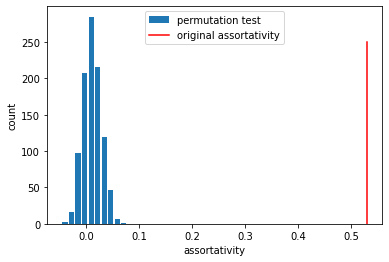

In [16]:
fig, ax = plt.subplots()
ax.hist(perm_assortativities, rwidth=0.8, label="permutation test")
ax.plot([assortativity, assortativity], [0, 250],
        color="r", label="original assortativity")
ax.set_ylabel("count")
ax.set_xlabel("assortativity")
ax.legend(loc=9)

To be sure the assortativity is not random, let's calculate a p-value for the null hypothesis that the assortativity is zero and the alternative hypothesis that it is positive (what we expected). 

In [17]:
# convert to a numpy array to allow for calculations on all elements of the 
# list simultaneously
perm_assortativities = np.asarray(perm_assortativities)

# calculate the p-value
p = (1 + sum(perm_assortativities > assortativity)) / len(perm_assortativities)
print(f"p-value: {p}")

p-value: 0.001


**Task 3.4**: After looking at the above results, do you think it is likely that the assortativity we found in the data was produced by chance?

# 4. Community detection

Let's test if Twitter communities match political affiliations!

**Task 4.1:** Remove nodes with degree zero in the network and run the [Louvain community detection algorithm](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.louvain.louvain_communities.html).

**Hint:** you can identify nodes with no edges using networkx's function `isolates()`.

In [18]:
G.remove_nodes_from(list(nx.isolates(G)))

In [19]:
import networkx.algorithms.community as nx_comm
communities = nx_comm.louvain_communities(G)

**Task 4.2:** Visualize the result coloring nodes by community labels.

In [20]:
# create a list with a color for each node
N_communities = len(communities)
cmap = plt.get_cmap("Set3")
colors = [cmap(i) for i in range(N_communities)]
color_dict = {community:color for community, color in zip(range(N_communities), colors)}

node_list = []
node_colors = []
for i, community in enumerate(communities):
    for node in community:
        node_list.append(node)
        node_colors.append(color_dict[i])

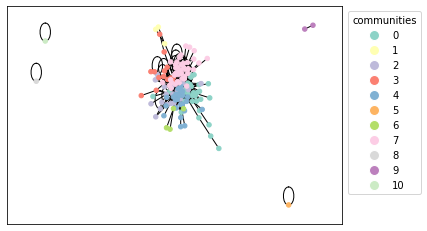

In [21]:
# draw the network
fig, ax = plt.subplots()
nx.draw_networkx(
    G, 
    nodelist=node_list,
    node_color=node_colors,
    node_size=20, 
    with_labels=False,
    ax=ax
)

# add a legend
legend_elements = [Line2D([0], [0], marker='o', color="w", label=key,
                          markerfacecolor=val, markersize=10) for key, val in color_dict.items()]
ax.legend(
    handles=legend_elements,
    title="communities",
    loc=1, 
    bbox_to_anchor=[1.25, 1, 0, 0]
)

**Task 4.3:** Run the `modularity` [function](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.quality.modularity.html) with the above community labels to measure how [modular](https://en.wikipedia.org/wiki/Modularity_(networks)#:~:text=Modularity%20is%20a%20measure%20of,between%20nodes%20in%20different%20modules.) the network is. Is it high enough to think that the network has a community structure?

In [22]:
nx_comm.modularity(G, communities)

0.4980845279288185

**Task 4.4:** To understand which parties are represented in each community, build a data frame for nodes with two columns: one with the party label and another one with the community label. Use the `groupby()` function to print a contingency table. Which party or parties compose each community?

In [24]:
# create a copy of the user data frame with all users that are also in the graph
user_communities = users[users["id"].isin(G.nodes)][["id", "party"]].copy()
user_communities = user_communities.set_index("id")
user_communities["community"] = -1
for i, community in enumerate(communities):
    user_communities.loc[list(community), "community"] = i
user_communities = user_communities\
    .reset_index()\
    .sort_values(by="party")

In [25]:
user_communities\
    .groupby(["party", "community"])\
    .count()\
    .rename(columns={"id":"count"})

count
party community       
AL    7              2
BDP   0              5
      2              3
      3              1
      7              1
CVP   0             15
      6              1
EDU   2              1
EVP   0              2
      1              3
FDP   0              1
      2              8
      7              2
GLP   2              1
      3             13
Green 0              1
      4             22
      7              2
SP    0              3
      2              2
      4              2
      5              1
      6              3
      7             34
      8              1
SVP   0              2
      2              2
      9              2
      10             1
UP    2              2

**Task 4.5:** Repeat the modularity calculation but using the party labels instead of the communities detected with Louvain. Is it higher or lower?

In [26]:
parties = users["party"].unique()
party_communities = []
for party in parties:
    # filter a subset of users that is in the given party and in the graph
    party_members = users[(users["party"] == party) & users["id"].isin(G.nodes)]
    party_communities.append(set(party_members["id"].values))

In [27]:
nx_comm.modularity(G, party_communities)

0.4213398594732011

# To learn more
* How well can you predict the party of a politician from its neighbors in the network? Here you can use the rule of predicting the party as the majority party among its neighbors and evaluate the accuracy of this approach.
* What would be the results if we use the network of replies? Do you expect assortativity and modularity to be higher or lower?
* If you retrieved data of follower links, you can repeat the above analysis for undirected following relationships. Do you expect a higher or lower assortativity?

# Appendix: constructing the timelines of Twitter users

In [ ]:
! pip install twarc

In [ ]:
from twarc import Twarc2
from datetime import datetime, timezone

First connect to the Twitter API using your credentials.

In [2]:
bearer_token = "XXX" # replace the XXX with your bearer token
twarc_client = Twarc2(bearer_token=bearer_token)

## Download users

Import the file SwissPoliticians.csv and read it as a csv. Take into account that separators are tabs.

In [262]:
screen_names = pd.read_csv("SwissPoliticians.csv", sep="\t")
screen_names.head()

,screenName,party
0,andreaskirstein,AL
1,bergerwthur,AL
2,MaeniJ,AL
3,WalterAngst,AL
4,asba_j,BDP


Download the basic profile information of each user by screenname. See function `user_lookup()` in [twarc2](https://twarc-project.readthedocs.io/en/latest/api/client2/#twarc.client2.Twarc2.user_lookup).

In [263]:
users = []
for user in twarc_client.user_lookup(screen_names["screenName"], usernames=True):
    users.append(user)
users = pd.json_normalize(users, record_path=['data'])
users.head(2)

,verified,username,pinned_tweet_id,name,profile_image_url,id,description,url,location,protected,created_at,entities.url.urls,public_metrics.followers_count,public_metrics.following_count,public_metrics.tweet_count,public_metrics.listed_count,entities.description.mentions,entities.description.urls,entities.description.hashtags
0,False,andreaskirstein,1180883993480323073,Andreas Kirstein,https://pbs.twimg.com/profile_images/149375950...,25254764,Gemeinderat. Arbeitet in der ETH-Bibliothek. T...,https://t.co/pbzTpZ2ztz,Zürich,False,2009-03-19T07:21:05.000Z,"[{'start': 0, 'end': 23, 'url': 'https://t.co/...",734,518,13312,37,NaN,NaN,NaN
1,False,BergerWthur,1489912638012276737,David B. aus W. 📠 🚱🦬✭,https://pbs.twimg.com/profile_images/131178937...,472372843,Alt-Gemeinderat Winterthur (Alternative Liste)...,https://t.co/O4Ttdturoi,Winterthur,False,2012-01-23T21:48:27.000Z,"[{'start': 0, 'end': 23, 'url': 'https://t.co/...",525,373,8181,17,NaN,NaN,NaN


Merge the user information you retrieved from Twitter with the party affiliations from the `SwissPoliticians.csv` file. Remove all protected users from the dataset and save the user dataset to disk. To prevent merging issues, convert the screen names in both data frames to lower case.

In [264]:
screen_names["screenName"] = screen_names["screenName"].str.lower()
users["username"] = users["username"].str.lower()
users = pd.merge(users, screen_names, how="right", left_on="username", right_on="screenName")

In [271]:
N = len(users)
users = users[users["protected"] == False]
print(f"removed {N - len(users)} protected accounts")

removed 55 protected accounts


In [58]:
# save the cleaned and merged user file for later use
users.to_csv("users.csv", index=False)

## Download timelines

Now retrieve the all tweets from the last 5 days for each user using [twarc](https://twarc-project.readthedocs.io/en/latest/api/client2/#twarc.client2.Twarc2.timeline)'s `timeline()` function. Since we want to build a retweet network, we need to know the user ID of the original tweet for every retweet. To get this information, we need to request an *[expansion](https://developer.twitter.com/en/docs/twitter-api/expansions)*.

It might take a bit to get data. If you run unto the [rate limit](https://developer.twitter.com/en/docs/twitter-api/rate-limits) of the Twitter API, you might have to wait up to 15 min to retrieve all tweets. Twarc will wait and resume the request automatically and print a warning.

Save the result in a file called `timelines_raw.csv` so you can reload it at a later point in time.

In [ ]:
start = datetime(2021, 7, 12, 0, 0, 0, 0, tzinfo=timezone.utc)
end = datetime(2022, 7, 12, 0, 0, 0, 0, tzinfo=timezone.utc)

timelines = []
for i, userID in enumerate(users["id"]):
    if i%50 == 0:
        print(f"{i}/{len(users)}")
    for timeline in twarc_client.timeline(
        userID,
        exclude_retweets=False,
        exclude_replies=False,
        start_time=start,
        end_time=end,
        expansions=["referenced_tweets.id"]
        ):
        timelines.append(timeline)

In [274]:
# since we requested an expansion in the referenced_tweets.id field, we have a 
# rather complicated nested JSON structure now. We use the ensure_flattened
# utility to flatten the JSON structure into a more manageable format
from twarc.expansions import ensure_flattened
timelines = ensure_flattened(timelines)

In [275]:
# parse the JSON into a .csv (still not completely flat) and save
timelines = pd.json_normalize(timelines)
timelines.to_csv("timelines_raw.csv", index=False)

## Clean timelines

In [3]:
# load timelines and users from file
timelines = pd.read_csv(
    "timelines_raw.csv",
    dtype={"id":str, "author_id":str, "conversation_id":str}, # load all IDs as string to prevent long integer overflows
    parse_dates=["created_at"] # parse the tweet creation date as datetime
)
users = pd.read_csv(
    "users.csv",
    dtype={"id":str},
    parse_dates=["created_at"]
)

# since the referenced_tweets field contains a list of dictionaries that is 
# stored as a string, we need to parse it first to restore its structure as
# list of dictionaries to interact with it
timelines["referenced_tweets"] = timelines["referenced_tweets"]\
    .apply(lambda x: eval(x) if x == x else np.nan)

/tmp/ipykernel_697369/812648354.py:2: DtypeWarning: Columns (25,26,28,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  timelines = pd.read_csv(


The field `referenced_tweets` currently contains a list where each entry is a tweet object (since we requested the expansion on the field `referenced_tweets.id`:

In [4]:
timelines.loc[0, "referenced_tweets"]

[{'type': 'retweeted',
  'id': '1546388828667006977',
  'author_id': '1391450099205779456',
  'entities': {'urls': [{'start': 209,
     'end': 232,
     'url': 'https://t.co/GGIk9ne4KI',
     'expanded_url': 'https://doi.org/10.35016/ethz-cs-22047-de',
     'display_url': 'doi.org/10.35016/ethz-…'},
    {'start': 233,
     'end': 256,
     'url': 'https://t.co/6OBB5pJQkh',
     'expanded_url': 'https://twitter.com/ETHBildarchiv/status/1546388828667006977/photo/1',
     'display_url': 'pic.twitter.com/6OBB5pJQkh',
     'media_key': '3_1546383410716938241'}],
   'hashtags': [{'start': 174, 'end': 179, 'tag': 'Blog'},
    {'start': 180, 'end': 194, 'tag': 'Crowdsourcing'},
    {'start': 195, 'end': 208, 'tag': 'WerWeissMehr'}],
   'mentions': [{'start': 29,
     'end': 41,
     'username': 'zrh_airport',
     'id': '282510542'}]},
  'source': 'Twitter Web App',
  'possibly_sensitive': False,
  'attachments': {'media_keys': ['3_1546383410716938241'], 'media': [{}]},
  'reply_settings': 'ev

To construct our retweet network, we need to know (a) whether a tweet was a retweet and (b) the ID of the account that posted the tweet that was retweeted. Below we define two functions that help us extract this information from the `referenced_tweets` field:

In [5]:
def check_retweet(entry):
    '''Checks whether a tweet is a retweet'''
    if entry != entry: # NaN check
        return False
    for reference in entry:
        if reference["type"] == "retweeted":
            return True
    return False

def get_retweet_author(entry):
    '''Returns the author ID of the retweeted tweet'''
    if entry != entry: # NaN check
        return np.nan
    for reference in entry:
        if reference["type"] == "retweeted":
            return reference["author_id"]
    return np.nan

Apply the functions `check_retweet()` and `get_retweet_author` to the column `referenced_tweets` and create two new columns `retweeted` and `retweet_user_id` containing the relevant information.

In [6]:
# create reference type columns
timelines["retweeted"] = timelines["referenced_tweets"].apply(check_retweet)
# create referenced tweet ID columns
timelines["retweet_user_id"] = timelines["referenced_tweets"].apply(get_retweet_author)

In [12]:
# save the file with the columns of interest
cols = ["author_id", "id", "lang", "text", "retweeted", "retweet_user_id", 
        "created_at", 'public_metrics.retweet_count', 'public_metrics.reply_count',
       'public_metrics.like_count', 'public_metrics.quote_count']
timelines[cols].to_csv("timelines.csv", index=False)